### SKLEARN - Classification

>  The goal is to predict the categorical class labels which are discrete and unordered. The goal is to predict the categorical class labels which are discrete and unordered.

### Library Importation

In [1]:
## Import the Libraries
import pandas as pd
import numpy as np

### Data Loading

In [2]:
## Loading Data
data = pd.read_csv('./data/GermanCredit.csv')
data.head()

,checking_acc,duration_mnth,credit_hist,purpose,credit_amt,savings_acc,emp_status,installment_rate,pstatus_sex,guarantor,...,property,age,installment_plan,housing,existing_credit,job,dependents,telephone,foreign_worker,credit
0,Less than 0 DM,6,Critical account,radio/television,1169,none,Greater than 7 years,4,male_single,none,...,real estate,67,none,own,2,skilled employee,1,registered,yes,bad
1,Btw 0 to 199 DM,48,Existing credits paid back duly,radio/television,5951,Less than 100 DM,Btw 1 to 4 years,2,female_divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee,1,none,yes,good
2,none,12,Critical account,education,2096,Less than 100 DM,Btw 4 to 7 years,2,male_single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,bad
3,Less than 0 DM,42,Existing credits paid back duly,furniture/equipment,7882,Less than 100 DM,Btw 4 to 7 years,2,male_single,guarantor,...,BSSA or life insurance,45,none,free,1,skilled employee,2,none,yes,bad
4,Less than 0 DM,24,Delays in paying off,new car,4870,Less than 100 DM,Btw 1 to 4 years,3,male_single,none,...,none,53,none,free,2,skilled employee,2,none,yes,good


### Data Unseen

In [27]:
# Holding out Data as unseen from the model
unseen = data.sample(n= 100)
data = data[~data.index.isin(unseen.index)]
print(f'Data for model: {data.shape},\nData for unseen predictions: {unseen.shape}')
unseen.to_csv('./data/Germancredit_unseen.csv', index=False)

Data for model: (800, 21),
Data for unseen predictions: (100, 21)


In [28]:
## Creating X and y
# data.columns!='credit'
X = data.loc[: , data.columns!='credit']
y = data.loc[: , data.columns=='credit'].values[:,0] # or df['species'].values

###  Compare Model

In [29]:
# preprocessing
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

# models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

models = [
    CatBoostClassifier(),
    LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2930, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) #over fit but increasing the leaves
]

def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('scaler', StandardScaler(with_mean=False)),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print(f"{estimator.__class__.__name__}:\n Precision: {precision_score(expected, predicted)* 100:,.1f}%\n"
          f" Recall: {recall_score(expected, predicted)* 100:,.1f}%\n"
          f" Accuracy: {accuracy_score(expected, predicted)* 100:,.1f}%\n"
          f" F1 Score: {f1_score(expected, predicted)* 100:,.1f}%\n"
         )
for model in models:
    score_model(X, y, model)


Learning rate set to 0.009366
0:	learn: 0.6899972	total: 12.7ms	remaining: 12.7s
1:	learn: 0.6863266	total: 25.1ms	remaining: 12.5s
2:	learn: 0.6828310	total: 40.4ms	remaining: 13.4s
3:	learn: 0.6789417	total: 51.2ms	remaining: 12.7s
4:	learn: 0.6758568	total: 62.1ms	remaining: 12.4s
5:	learn: 0.6727216	total: 72.5ms	remaining: 12s
6:	learn: 0.6697706	total: 81.8ms	remaining: 11.6s
7:	learn: 0.6666071	total: 91.7ms	remaining: 11.4s
8:	learn: 0.6639417	total: 101ms	remaining: 11.2s
9:	learn: 0.6612231	total: 110ms	remaining: 10.9s
10:	learn: 0.6581335	total: 120ms	remaining: 10.8s
11:	learn: 0.6553961	total: 129ms	remaining: 10.6s
12:	learn: 0.6531320	total: 138ms	remaining: 10.5s
13:	learn: 0.6501837	total: 147ms	remaining: 10.4s
14:	learn: 0.6471436	total: 157ms	remaining: 10.3s
15:	learn: 0.6445770	total: 166ms	remaining: 10.2s
16:	learn: 0.6412958	total: 175ms	remaining: 10.1s
17:	learn: 0.6396383	total: 179ms	remaining: 9.78s
18:	learn: 0.6370795	total: 189ms	remaining: 9.73s
19:	l

169:	learn: 0.4705872	total: 2.08s	remaining: 10.2s
170:	learn: 0.4700273	total: 2.09s	remaining: 10.2s
171:	learn: 0.4695359	total: 2.1s	remaining: 10.1s
172:	learn: 0.4688512	total: 2.11s	remaining: 10.1s
173:	learn: 0.4684274	total: 2.12s	remaining: 10.1s
174:	learn: 0.4677111	total: 2.13s	remaining: 10.1s
175:	learn: 0.4670716	total: 2.14s	remaining: 10s
176:	learn: 0.4666438	total: 2.15s	remaining: 10s
177:	learn: 0.4659201	total: 2.16s	remaining: 9.99s
178:	learn: 0.4651576	total: 2.18s	remaining: 9.98s
179:	learn: 0.4645522	total: 2.19s	remaining: 9.96s
180:	learn: 0.4640416	total: 2.19s	remaining: 9.94s
181:	learn: 0.4637009	total: 2.21s	remaining: 9.91s
182:	learn: 0.4632673	total: 2.21s	remaining: 9.89s
183:	learn: 0.4629826	total: 2.22s	remaining: 9.86s
184:	learn: 0.4623700	total: 2.23s	remaining: 9.84s
185:	learn: 0.4614744	total: 2.24s	remaining: 9.81s
186:	learn: 0.4606968	total: 2.25s	remaining: 9.79s
187:	learn: 0.4600595	total: 2.26s	remaining: 9.76s
188:	learn: 0.459

346:	learn: 0.3908990	total: 3.96s	remaining: 7.45s
347:	learn: 0.3905310	total: 3.97s	remaining: 7.44s
348:	learn: 0.3901265	total: 3.98s	remaining: 7.43s
349:	learn: 0.3897077	total: 3.99s	remaining: 7.41s
350:	learn: 0.3893674	total: 4s	remaining: 7.4s
351:	learn: 0.3891000	total: 4.01s	remaining: 7.38s
352:	learn: 0.3889126	total: 4.02s	remaining: 7.37s
353:	learn: 0.3886393	total: 4.03s	remaining: 7.36s
354:	learn: 0.3884331	total: 4.04s	remaining: 7.34s
355:	learn: 0.3881470	total: 4.05s	remaining: 7.33s
356:	learn: 0.3878674	total: 4.06s	remaining: 7.32s
357:	learn: 0.3874031	total: 4.07s	remaining: 7.3s
358:	learn: 0.3870183	total: 4.08s	remaining: 7.29s
359:	learn: 0.3867889	total: 4.09s	remaining: 7.27s
360:	learn: 0.3866996	total: 4.1s	remaining: 7.26s
361:	learn: 0.3865794	total: 4.11s	remaining: 7.24s
362:	learn: 0.3862154	total: 4.12s	remaining: 7.23s
363:	learn: 0.3858784	total: 4.13s	remaining: 7.21s
364:	learn: 0.3855391	total: 4.14s	remaining: 7.2s
365:	learn: 0.38542

515:	learn: 0.3456189	total: 5.64s	remaining: 5.29s
516:	learn: 0.3454863	total: 5.65s	remaining: 5.28s
517:	learn: 0.3452849	total: 5.66s	remaining: 5.26s
518:	learn: 0.3450338	total: 5.67s	remaining: 5.25s
519:	learn: 0.3448767	total: 5.68s	remaining: 5.24s
520:	learn: 0.3445378	total: 5.69s	remaining: 5.23s
521:	learn: 0.3443066	total: 5.7s	remaining: 5.22s
522:	learn: 0.3438638	total: 5.72s	remaining: 5.21s
523:	learn: 0.3436564	total: 5.73s	remaining: 5.2s
524:	learn: 0.3433838	total: 5.74s	remaining: 5.19s
525:	learn: 0.3431516	total: 5.75s	remaining: 5.18s
526:	learn: 0.3429599	total: 5.76s	remaining: 5.17s
527:	learn: 0.3428041	total: 5.77s	remaining: 5.16s
528:	learn: 0.3426571	total: 5.79s	remaining: 5.15s
529:	learn: 0.3424705	total: 5.8s	remaining: 5.14s
530:	learn: 0.3421553	total: 5.81s	remaining: 5.13s
531:	learn: 0.3418811	total: 5.82s	remaining: 5.12s
532:	learn: 0.3416784	total: 5.82s	remaining: 5.1s
533:	learn: 0.3414170	total: 5.83s	remaining: 5.09s
534:	learn: 0.34

680:	learn: 0.3126997	total: 7.32s	remaining: 3.43s
681:	learn: 0.3124754	total: 7.32s	remaining: 3.42s
682:	learn: 0.3121581	total: 7.33s	remaining: 3.4s
683:	learn: 0.3120228	total: 7.34s	remaining: 3.39s
684:	learn: 0.3118482	total: 7.35s	remaining: 3.38s
685:	learn: 0.3117557	total: 7.37s	remaining: 3.37s
686:	learn: 0.3114896	total: 7.38s	remaining: 3.36s
687:	learn: 0.3112905	total: 7.38s	remaining: 3.35s
688:	learn: 0.3111367	total: 7.4s	remaining: 3.34s
689:	learn: 0.3109435	total: 7.41s	remaining: 3.33s
690:	learn: 0.3108665	total: 7.42s	remaining: 3.32s
691:	learn: 0.3108094	total: 7.43s	remaining: 3.31s
692:	learn: 0.3106499	total: 7.44s	remaining: 3.29s
693:	learn: 0.3105680	total: 7.45s	remaining: 3.28s
694:	learn: 0.3103777	total: 7.46s	remaining: 3.27s
695:	learn: 0.3102786	total: 7.47s	remaining: 3.26s
696:	learn: 0.3101210	total: 7.48s	remaining: 3.25s
697:	learn: 0.3100670	total: 7.49s	remaining: 3.24s
698:	learn: 0.3098636	total: 7.49s	remaining: 3.23s
699:	learn: 0.

847:	learn: 0.2930922	total: 8.97s	remaining: 1.61s
848:	learn: 0.2930386	total: 8.98s	remaining: 1.6s
849:	learn: 0.2929745	total: 8.99s	remaining: 1.58s
850:	learn: 0.2929035	total: 9s	remaining: 1.57s
851:	learn: 0.2926906	total: 9.01s	remaining: 1.56s
852:	learn: 0.2926274	total: 9.02s	remaining: 1.55s
853:	learn: 0.2925638	total: 9.03s	remaining: 1.54s
854:	learn: 0.2925135	total: 9.04s	remaining: 1.53s
855:	learn: 0.2924539	total: 9.05s	remaining: 1.52s
856:	learn: 0.2923980	total: 9.06s	remaining: 1.51s
857:	learn: 0.2923473	total: 9.06s	remaining: 1.5s
858:	learn: 0.2922912	total: 9.07s	remaining: 1.49s
859:	learn: 0.2922237	total: 9.08s	remaining: 1.48s
860:	learn: 0.2921550	total: 9.09s	remaining: 1.47s
861:	learn: 0.2920985	total: 9.1s	remaining: 1.46s
862:	learn: 0.2920349	total: 9.11s	remaining: 1.45s
863:	learn: 0.2919715	total: 9.12s	remaining: 1.44s
864:	learn: 0.2919085	total: 9.13s	remaining: 1.43s
865:	learn: 0.2918494	total: 9.14s	remaining: 1.41s
866:	learn: 0.2917

### Build Model

In [30]:
# Label encoding y
y = LabelEncoder().fit_transform(y)

In [31]:
# encoding 
# get the categorical and numeric column names
num_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print(num_cols, '\n', cat_cols)

['duration_mnth', 'credit_amt', 'installment_rate', 'Residence_LOS', 'age', 'existing_credit', 'dependents'] 
 ['checking_acc', 'credit_hist', 'purpose', 'savings_acc', 'emp_status', 'pstatus_sex', 'guarantor', 'property', 'installment_plan', 'housing', 'job', 'telephone', 'foreign_worker']


In [32]:
# pipeline for numerical columns
num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [33]:
# pipeline for categorical columns
cat_pipe = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='N/A'),
    OneHotEncoder(handle_unknown='ignore', sparse=False)
)
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='N/A', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [34]:
# combine both the pipelines
pipeline = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])
pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['duration_mnth', 'credit_amt',
                                  'installment_rate', 'Residence_LOS', 'age',
                                  'existing_credit', 'dependents']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='N/A',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['checking_acc', 'credit_hist', 'purpose',
                                  'savings_acc', 'emp_status', 'pstatus_sex',
                                  'guarantor', 'property', 'installment_plan',
                                  'housing', 'job', 'telephone',
                                  'foreign_worker'])])

In [69]:
# build the model
lr_model = make_pipeline(pipeline, LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2930, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False))
lr_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration_mnth',
                                                   'credit_amt',
                                                   'installment_rate',
                                                   'Residence_LOS', 'age',
                                                   'existing_credit',
                                                   'dependents']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N/A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['checking_acc',
                                                   'credit_hist', 'purpose',
                                                   'savings_acc', 'emp_status',
                                                   'pstatus_sex', 'guarantor',
                                                   'property',
                                                   'installment_plan',
                                                   'housing', 'job',
                                                   'telephone',
                                                   'foreign_worker'])])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=2930))])

In [70]:
# train the model
lr_model.fit(X_train, y_train)

C:\Users\HP\miniconda3\envs\pyc310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration_mnth',
                                                   'credit_amt',
                                                   'installment_rate',
                                                   'Residence_LOS', 'age',
                                                   'existing_credit',
                                                   'dependents']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N/A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['checking_acc',
                                                   'credit_hist', 'purpose',
                                                   'savings_acc', 'emp_status',
                                                   'pstatus_sex', 'guarantor',
                                                   'property',
                                                   'installment_plan',
                                                   'housing', 'job',
                                                   'telephone',
                                                   'foreign_worker'])])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=2930))])

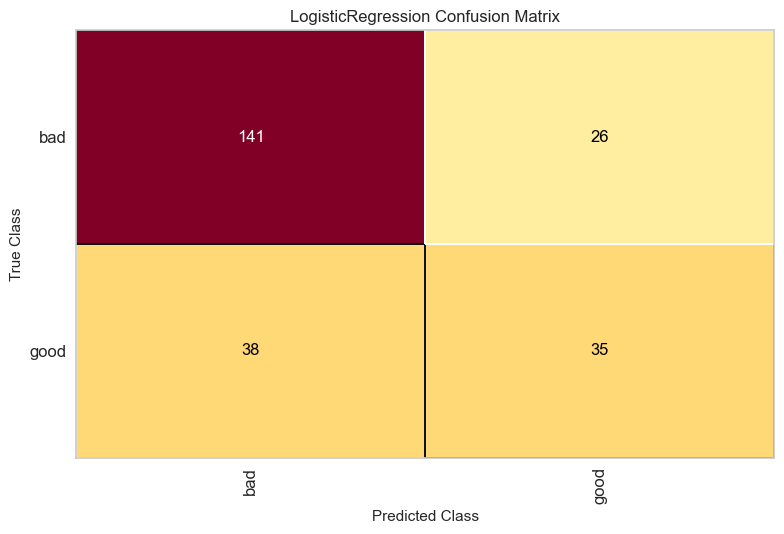

<AxesSubplot: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [77]:
## Looking at the performace of the data over its test
from yellowbrick.classifier import confusion_matrix
# Instantiate the classification model and visualizer
visualizer = confusion_matrix(lr_model, X_train, y_train, X_test, y_test,classes=['bad', 'good'], support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()      

### Test Unseen Data

In [71]:
# Predict the target values for the test data using the trained model
unseen_pred = lr_model.predict(unseen)

# Print the predicted values
print(unseen_pred)

['bad' 'bad' 'bad' 'bad' 'good' 'bad' 'good' 'bad' 'bad' 'bad' 'bad' 'bad'
 'bad' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'good'
 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'good'
 'bad' 'good' 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'good'
 'bad' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'good'
 'bad' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad'
 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'bad' 'bad'
 'bad' 'bad' 'bad' 'bad' 'good' 'bad' 'bad' 'bad']


In [72]:
accuracy = accuracy_score(unseen['credit'], unseen_pred)
precision = precision_score(unseen['credit'], unseen_pred, average='macro')
recall = recall_score(unseen['credit'], unseen_pred, average='macro')

# Print the scores
print(f'Accuracy score: {accuracy *100:,.1f}' )
print(f'Precision score: {precision *100:,.1f}')
print(f'Recall score: {recall *100:,.1f}')

Accuracy score: 78.0
Precision score: 72.8
Recall score: 69.4


### Export Model

In [ ]:
import joblib
joblib.dump(cb_model, './model/sk_german_credit.pkl')
print(lr_model)